<a href="https://colab.research.google.com/github/thanhnt19146391/thanhnt19146391/blob/main/CNN_emotions/CNN_emotions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import

In [25]:
# Import packages
from keras.models import Sequential, load_model
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten, BatchNormalization
from keras.datasets import cifar10
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import pandas as pd
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
def make_some_noise():
    # Play an audio 
    from google.colab import output
    output.eval_js('new Audio("https://www.soundjay.com/nature/sounds/rain-01.mp3").play()')

In [28]:
def upload_files():
    # Upload file from computer to Colab
    from google.colab import files
    uploaded = files.upload()

# Declare

In [29]:
PATH = "/content/drive/MyDrive/Colab Notebooks/AI/CNN_emotions/emotion_datasets/"
CLASS = [
    "happy",
    "sad",
    "angry",
    "surprise"
]

In [30]:
def Read_datasets():

    images = []
    values = []
    for key in CLASS:
        value = CLASS.index(key)
        for filename in glob.glob(PATH + key + '/*.jpg'):
            # print(filename)
            img = load_img(
                filename,
                target_size = (150, 150)
            )
            images.append(img)     
            values.append([value])     

    # Convert list to array
    images = np.array(images)
    values = np.array(values)

    # Create a random permutarion of the indices
    shuffled_indices = np.random.permutation(len(images)) #return a permutation of the indices

    print(f"shuffled indices: {shuffled_indices}")

    # Shuffle 2 array
    images = images[shuffled_indices]
    values = values[shuffled_indices]

    # Join a array along new axis
    images = np.stack(images, axis = 0)
    values = np.stack(values, axis = 0)

    # print(images.shape)
    # print(values.shape)

    # Convert array to tuple
    data = (images, values)

    return data

shuffled indices: [18 11 79 72 15 61  7 71 35 78 75 49 12  0 51  4 46 59 22 68 44 31 37 39
 57 29 33 36 70  9 17 24 63 30  2  5 47 16 42  3 52 43 19 13 64 60 48 28
 54  1 23 65 34 67 32 69 26  8 62 20 14 21 58 53 56 76 38 66 77 50 27 45
 41 10 55  6 74 73 25 40]
Shape of x_train:  (80, 150, 150, 3)
Shape of y_train:  (80, 1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: FutureWarning: The input object of type 'Image' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Image', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


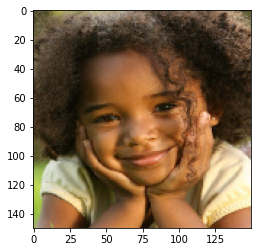

[0]


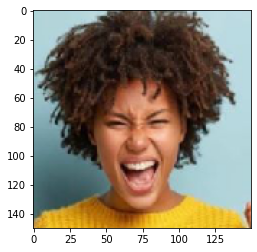

[0]


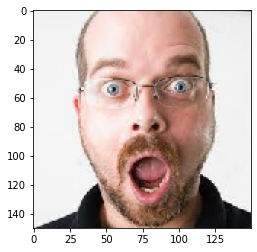

[3]


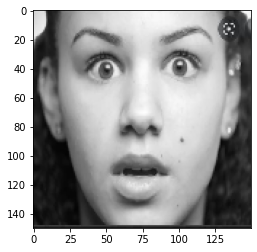

[3]


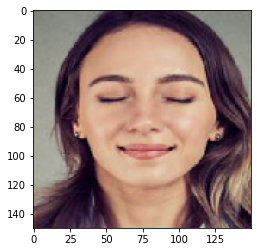

[0]


In [31]:
# Read data
x_train, y_train = Read_datasets()

print('Shape of x_train: ', x_train.shape)
print('Shape of y_train: ', y_train.shape) 

for i in range(0, 5):
    plt.imshow(x_train[i])
    plt.show()
    print(y_train[i])

In [32]:
def format_input_data(data):
    data = data.astype('float32')
    data /= 255
    return data

In [33]:
def format_output_data(data):
    data = np_utils.to_categorical(data)
    return data

In [34]:
# format datasets
x_train = format_input_data(x_train)
y_train = format_output_data(y_train)

print('x_train shape: ', x_train.shape)
print('y_train shape: ', y_train.shape)

x_train shape:  (80, 150, 150, 3)
y_train shape:  (80, 4)


# Build model

In [41]:
def build_model1(input_shape, num_class):
    model = Sequential()

    # 1st block
    model.add(Conv2D(32, (3,3), padding='same',
    input_shape=input_shape, activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3,3), padding='same',
    activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.2))

    # 2nd block
    model.add(Conv2D(64, (3,3), padding='same',
    activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3,3), padding='same',
    activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))

    # 3rd block
    model.add(Conv2D(128, (3,3), padding='same',
    activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3,3), padding='same',
    activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.4))

    # # 4th block
    model.add(Conv2D(256, (3,3), padding='same',
    activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(256, (3,3), padding='same',
    activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.5))

    # dense
    model.add(Flatten())
    model.add(
        Dense(
            128,
            activation = 'relu',
            kernel_initializer = "he_uniform"
        )
    )
    model.add(Dense(num_class, activation='softmax'))
    
    model.summary()
    return model

# Train model

In [44]:
def train_model1(model):
    opt = SGD(
        lr = 0.01, 
        momentum = 0.9
    )
    model.compile(
        loss='categorical_crossentropy',
        optimizer = Adam(),
        metrics=['accuracy']
    )
    # train
    batch_size = 32
    global x_train, y_train, x_test, y_test
    history = model.fit(
        x_train, y_train, 
        batch_size = batch_size,
        epochs = 20, 
    )
    return history

In [37]:
def plot_history(history):
    model_history = pd.DataFrame(history.history)
    # model_history.head(None)

    # Add column 'epoch'
    model_history['epoch'] = history.epoch
    # model_history.head(None)

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))
    num_epochs = model_history.shape[0]

    ax1.plot(np.arange(0, num_epochs), model_history["accuracy"], 
            label="Training accuracy")
    ax1.plot(np.arange(0, num_epochs), model_history["val_accuracy"], 
            label="Validation accuracy")
    ax1.legend()
    ax1.set_ylabel('accuracy')
    ax1.set_xlabel('epoch')
    ax1.set_title('Accuracy')
    ax2.set_title('Loss')
    ax2.plot(np.arange(0, num_epochs), model_history["loss"], 
            label="Training loss")
    ax2.plot(np.arange(0, num_epochs), model_history["val_loss"], 
            label="Validation loss")
    ax2.legend()
    ax2.set_ylabel('loss')
    ax2.set_xlabel('epoch')
    plt.tight_layout()
    plt.show()

# Training

In [49]:
model = build_model1((150, 150, 3), 4)
hist = train_model1(model)
make_some_noise()
model.save(PATH + "CNN_emotions_model1.h5")
# plot_history(hist)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 batch_normalization_34 (Bat  (None, 150, 150, 32)     128       
 chNormalization)                                                
                                                                 
 conv2d_35 (Conv2D)          (None, 150, 150, 32)      9248      
                                                                 
 batch_normalization_35 (Bat  (None, 150, 150, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 75, 75, 32)       0         
 g2D)                                                            
                                                      

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/20
3/3 [==============================] - 17s 4s/step - loss: 13.9544 - accuracy: 0.2500
Epoch 2/20
3/3 [==============================] - 15s 4s/step - loss: 12.4627 - accuracy: 0.2375
Epoch 3/20
3/3 [==============================] - 15s 5s/step - loss: 4.1429 - accuracy: 0.3250
Epoch 4/20
3/3 [==============================] - 16s 4s/step - loss: 1.6239 - accuracy: 0.4125
Epoch 5/20
3/3 [==============================] - 15s 4s/step - loss: 1.2458 - accuracy: 0.5750
Epoch 6/20
3/3 [==============================] - 18s 6s/step - loss: 1.7825 - accuracy: 0.6125
Epoch 7/20
3/3 [==============================] - 15s 4s/step - loss: 0.9418 - accuracy: 0.6500
Epoch 8/20
3/3 [==============================] - 15s 4s/step - loss: 1.0383 - accuracy: 0.7000
Epoch 9/20
3/3 [==============================] - 15s 4s/step - loss: 0.9436 - accuracy: 0.6625
Epoch 10/20
3/3 [==============================] - 15s 4s/step - loss: 0.8361 - accuracy: 0.7875
Epoch 11/20
3/3 [====================

In [50]:
# Save model
model.save(PATH + "CNN_emotions_model1.h5")

In [51]:
model = load_model(PATH + "CNN_emotions_model1.h5")

In [52]:
upload_files()

Saving happy1.jpg to happy1.jpg
Saving happy2.jpg to happy2.jpg
Saving sad1.jpg to sad1.jpg
Saving sad2.jpg to sad2.jpg
Saving surprise1.jpg to surprise1.jpg
Saving surprise2.jpg to surprise2.jpg
Saving angry1.jpg to angry1.jpg
Saving angry2.jpg to angry2.jpg


Confidence:  54.11782264709473
angry


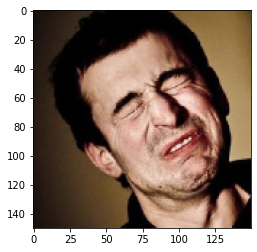

In [58]:
filename = 'angry2.jpg'
img = load_img(
    filename,
    target_size = (150, 150)
)
plt.imshow(img)
# print(type(img))
img = img_to_array(img)
# print(img.shape)
img = img.reshape(1, 150, 150, 3)
img = img.astype("float32")
img /= 255
prediction = model.predict(img)
# print(prediction)
confidence = np.max(prediction)
print("Confidence: ", confidence * 100)
index = np.argmax(prediction, axis = 1)[0] 
print(CLASS[index])